In [6]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import rlcache.utils.visualiser as viz
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
directory = 'results/rl_multi_strategy/cache_capacity_5000/2019_05_18_20_39'
eviction_name = 'rl_multi_strategy_'

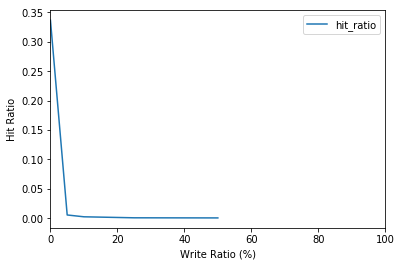

In [29]:
viz.plot_hitrate(directory)

In [30]:
perf = viz.plot_eviction_precision(directory, eviction_name)

FileNotFoundError: [Errno 2] File b'results/rl_multi_strategy/cache_capacity_5000/2019_05_18_20_39/eviction_strategy/rl_multi_strategy_performance_logger.log' does not exist: b'results/rl_multi_strategy/cache_capacity_5000/2019_05_18_20_39/eviction_strategy/rl_multi_strategy_performance_logger.log'

In [ ]:
viz.calculate_f1_measure(perf)